In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import FeatureUnion, Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [5]:
# load data

df = pd.read_csv('../data/heart_cleveland_upload.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [6]:
# Simple EDA
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [7]:
df.shape

(297, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [6]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [7]:
# everything is  good

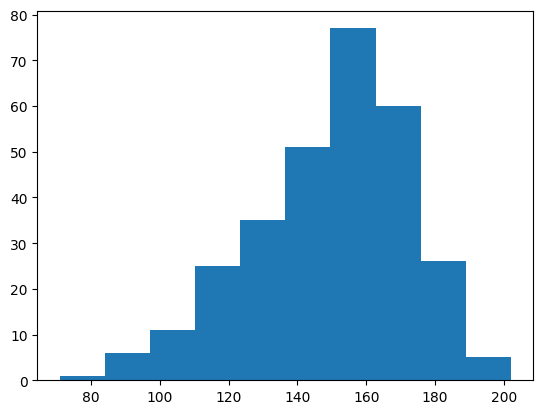

In [8]:
# check normality
plt.hist(df['thalach'])
plt.show()

## Let's apply some models

In [18]:
X = df.drop(columns=['condition'])
Y = df['condition']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
clf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=150, random_state=42)

In [24]:
y_pred = clf.predict(X_test)

In [26]:
print("Accuracy:", round(np.sum(y_pred == y_test) / len(y_pred), 3))

Accuracy: 0.733


In [4]:
%load_ext autoreload
%autoreload 2

In [9]:
import sys
sys.path.append("..")

In [14]:
from src.transformers import CustomScaler
from src.data import split_train_val_data, read_data

In [15]:
data = read_data('../data/heart_cleveland_upload.csv')

In [16]:
train_data, val_data = train_test_split(data)

In [17]:
train_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
158,70,1,3,130,322,0,2,109,0,2.4,1,3,0,1
216,58,1,3,128,259,0,2,130,1,3.0,1,2,2,1
218,58,0,3,130,197,0,0,131,0,0.6,1,0,0,0
92,61,1,2,150,243,1,0,137,1,1.0,1,0,0,0
178,64,0,3,180,325,0,0,154,1,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,58,1,1,120,284,0,2,160,0,1.8,1,0,0,1
19,42,1,0,148,244,0,2,178,0,0.8,0,2,0,0
225,57,1,3,165,289,1,2,124,0,1.0,1,3,2,1
189,62,0,3,138,294,1,0,106,0,1.9,1,3,0,1


In [18]:
import src.entities
from src.entities import TrainingPipelineParams

In [19]:
# let's test custom scaler

In [20]:
from src.transformers import CustomScaler

In [23]:
col_train = train_data['chol']
col_val = val_data['chol']

In [24]:
sc = CustomScaler()

In [36]:
# sc.fit(col_train)
sc.fit(train_data)

CustomScaler()

In [37]:
q = sc.transform(val_data)

In [38]:
q

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
251,-0.187577,-1.414214,0.883190,-0.138747,0.353107,-0.432627,0.977746,-0.276676,-0.678621,-0.568400,0.627219,-0.741715,-0.887911,-0.913625
269,-0.738399,0.707107,0.883190,-0.138747,0.200449,2.311462,0.977746,0.020254,1.473577,-0.904669,-0.991882,1.303760,1.197976,1.094541
140,-1.179057,0.707107,-0.143345,0.416240,-0.200278,-0.432627,0.977746,1.292809,-0.678621,-0.904669,-0.991882,-0.741715,-0.887911,-0.913625
133,-0.848564,0.707107,-0.143345,-1.359718,-0.047620,-0.432627,-1.032065,0.105091,-0.678621,-0.904669,-0.991882,-0.741715,-0.887911,1.094541
227,0.253080,0.707107,0.883190,-1.248720,-0.849074,-0.432627,-1.032065,-0.997790,1.473577,0.356339,0.627219,-0.741715,0.155032,-0.913625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,-0.077413,-1.414214,-0.143345,0.138747,1.116397,2.311462,-1.032065,0.868624,-0.678621,-0.904669,-0.991882,-0.741715,-0.887911,-0.913625
249,-0.077413,0.707107,0.883190,0.416240,-0.123949,-0.432627,-1.032065,0.444439,-0.678621,0.104137,-0.991882,-0.741715,-0.887911,-0.913625
293,-1.729879,0.707107,0.883190,-0.804731,-0.505593,-0.432627,-1.032065,-0.403931,-0.678621,0.104137,0.627219,-0.741715,1.197976,1.094541
82,1.244560,-1.414214,-0.143345,0.749232,0.620259,-0.432627,0.977746,0.105091,-0.678621,-0.904669,0.627219,0.281022,-0.887911,-0.913625


In [39]:
# plt.hist(q)
# plt.show()

In [33]:
col_train

158    322
216    259
218    197
92     243
178    325
      ... 
31     284
19     244
225    289
189    294
177    263
Name: chol, Length: 222, dtype: int64

In [40]:
true_sc = StandardScaler()
q1 = true_sc.fit(train_data).transform(val_data)

In [41]:
q1

array([[-0.18757728, -1.41421356,  0.88319037, ..., -0.741715  ,
        -0.88791126, -0.91362506],
       [-0.73839944,  0.70710678,  0.88319037, ...,  1.3037599 ,
         1.19797552,  1.09454091],
       [-1.17905716,  0.70710678, -0.14334503, ..., -0.741715  ,
        -0.88791126, -0.91362506],
       ...,
       [-1.72987932,  0.70710678,  0.88319037, ..., -0.741715  ,
         1.19797552,  1.09454091],
       [ 1.24456034, -1.41421356, -0.14334503, ...,  0.28102245,
        -0.88791126, -0.91362506],
       [-2.28070148,  0.70710678, -2.19641584, ..., -0.741715  ,
        -0.88791126, -0.91362506]])

In [42]:
# Look's the same